In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [3]:
import sys
function_path="D:/Visual/Project/Image_Classification/Functions"

In [4]:
#Path
train_dir = "D:/Visual/Project/Image_Classification/Data/Hand_1/train/"
val_dir="D:/Visual/Project/Image_Classification/Data/Hand_1/val/"
test_dir = "D:/Visual/Project/Image_Classification/Data/Hand_1/test/"

In [5]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['paper' 'rock' 'scissors']


Image shape: (200, 300, 3)


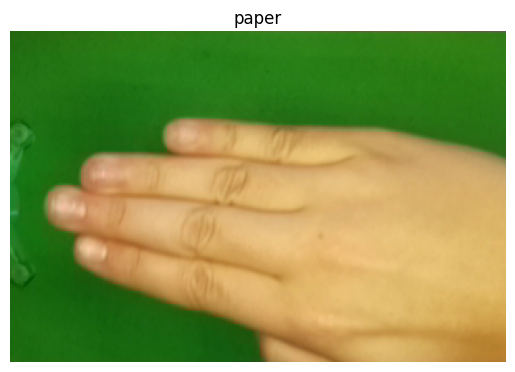

In [6]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)


# Load data in from directories and turn it into batches
train_data = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

val_data=val_datagen.flow_from_directory(val_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 1531 images belonging to 3 classes.
Found 326 images belonging to 3 classes.
Found 331 images belonging to 3 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

tf.random.set_seed(42)
# Create our model (a clone of model_8, except to be multi-class)
model_baseline= Sequential([
  Conv2D(16, 3, activation='relu', input_shape=(224, 224, 3)),
  
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
            padding="valid"), # padding can also be 'same'
  
  Conv2D(16, 3, activation='relu'),
  
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
            padding="valid"), # padding can also be 'same'

  Conv2D(16, 3, activation='relu'),
  
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
            padding="valid"), # padding can also be 'same'
  
  Conv2D(16, 3, activation='relu'),
  
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
            padding="valid"), # padding can also be 'same'
  
  Flatten(),
  Dense(3, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_baseline.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_baseline = model_baseline.fit(train_data, # now 10 different classes 
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_data=val_data,
                            validation_steps=len(val_data))

Epoch 1/5
48/48 [==============================] - 155s 3s/step - loss: 1.0999 - accuracy: 0.3416 - val_loss: 1.0877 - val_accuracy: 0.4785
Epoch 2/5
48/48 [==============================] - 142s 3s/step - loss: 0.9035 - accuracy: 0.5558 - val_loss: 0.5190 - val_accuracy: 0.8190
Epoch 3/5
48/48 [==============================] - 125s 3s/step - loss: 0.5565 - accuracy: 0.7720 - val_loss: 0.2686 - val_accuracy: 0.9080
Epoch 4/5
48/48 [==============================] - 114s 2s/step - loss: 0.5435 - accuracy: 0.7792 - val_loss: 0.1613 - val_accuracy: 0.9571
Epoch 5/5
48/48 [==============================] - 113s 2s/step - loss: 0.3873 - accuracy: 0.8550 - val_loss: 0.1208 - val_accuracy: 0.9755


In [9]:
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 16)      4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                    

In [10]:
loss,acc=model_baseline.evaluate(test_data)
print(loss,acc*100)

11/11 [==============================] - 7s 618ms/step - loss: 0.1275 - accuracy: 0.9637
0.1274760663509369 96.37462496757507


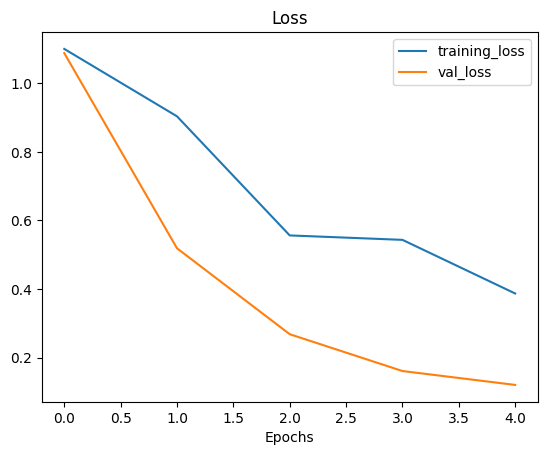

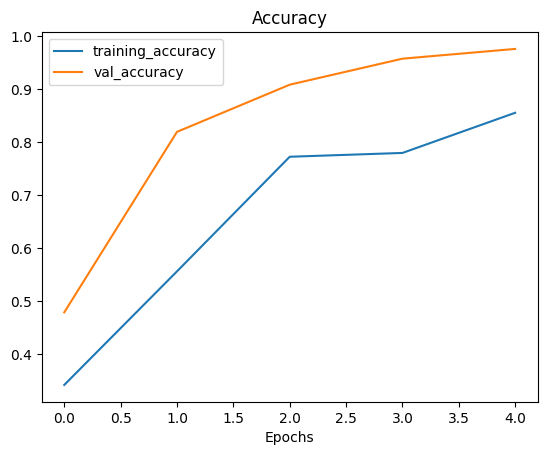

In [11]:
sys.path.insert(0,function_path)
from Plot import plot_loss_curves
plot_loss_curves(history_baseline)

1/1 [==============================] - 0s 306ms/step
[[9.6059620e-01 3.9025035e-02 3.7875748e-04]]


Text(0.5, 1.0, 'Prediction: paper')

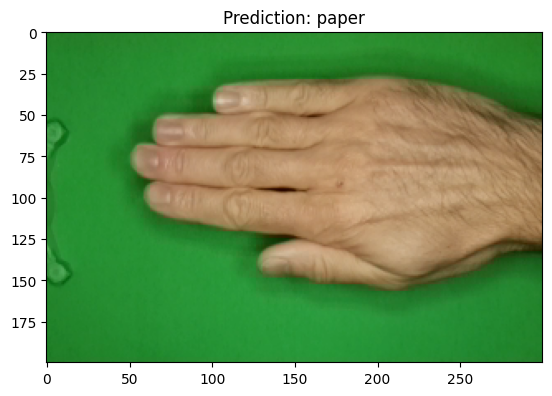

In [12]:
import random
import numpy as np
import matplotlib.image as mpimg 

# Setup target directory (we'll view images from here)
target_folder ="D:/Visual/Project/Image_Classification/Data/Hand_1/test/"+random.sample(["rock","scissors","paper"],1)[0]

# Get a random image path
random_image = random.sample(os.listdir(target_folder), 1)

# Read in the image and plot it using matplotlib
image = tf.io.read_file(target_folder + "/" + random_image[0])

img = tf.image.decode_image(image, channels=3)
img = tf.image.resize(img, size = [224,224])/255

pred = model_baseline.predict(tf.expand_dims(img, axis=0))

# Get the predicted class
pred_class = class_names[pred.argmax()]
print(pred)
# Plot the image and predicted class
img = mpimg.imread(target_folder + "/" + random_image[0])
plt.imshow(img)
plt.title(f"Prediction: {pred_class}")


In [14]:
model_baseline.save("Final.h5")